## Project: Finding Donors for *CharityML*

## Project Overview
In this project, I will employ several supervised algorithms of my choice to accurately model individuals' income using data collected from the 1994 U.S. Census. I will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. My goal with this implementation is to construct a model that accurately predicts whether an individual makes more than 50,000 dollars. This sort of task can arise in a non-profit setting, where organizations survive on donations. Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with. While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features.

## Steps
1. Define the objective
2. Get the Data
3. Explore the data
4. Prepare the data
5. Explore different models & shortlist best ones
6. Fine-tune model
7. 












. 

## Project Objective
CharityML is a charity organization was established to provide financial support for people eager to learn machine learning. After nearly 32,000 letters were sent to people in the community, CharityML determined that every donation they received came from someone that was making more than $50,000 annually. To expand their potential donor base, CharityML has decided to send letters to residents of California, but to only those most likely to donate to the charity. With nearly 15 million working Californians, CharityML has brought me on board to help build an algorithm to best identify potential donors and reduce overhead cost of sending mail. My goal will be evaluate and optimize several different supervised learners to determine which algorithm will provide the highest donation yield while also reducing the total number of letters being sent.

## Get the Data

####  Data Overview
The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data I investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# Load the Census dataset
data = pd.read_csv("census.csv")

In [4]:
# rows and columns of the data
print(data.shape)

# visualize the data
data.head()

(45222, 14)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


- The dataset contains 45222 rows, that is individuals, and 14 columns, i.e variables
- 13 are predictive variables and 1 is the target variable: income

## Explore the Data

Let begin by exploring the target distribution

In [5]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
print('Test columns:', test.columns.tolist())

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

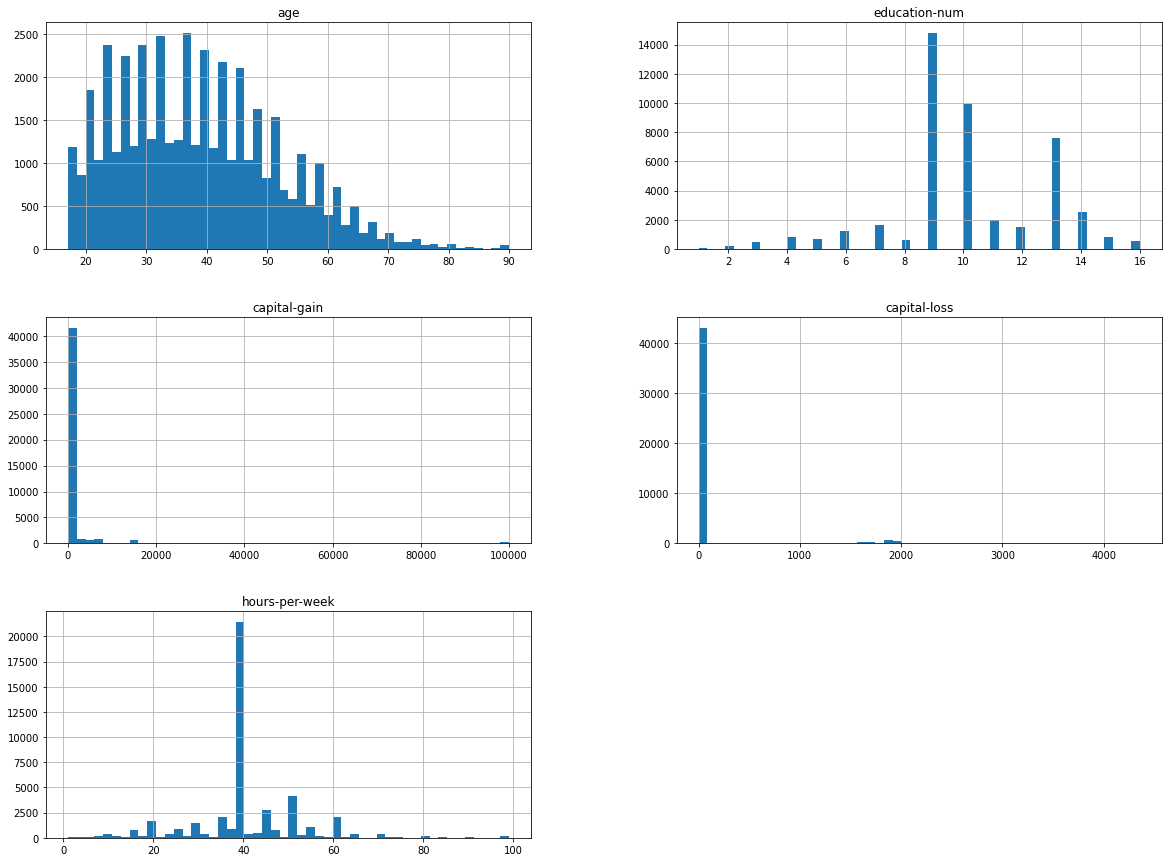

In [7]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

age [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59] 

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay'] 

education_level [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th'] 

education-num [13.  9.  7. 14.  5. 10. 12.  4. 16. 11. 15.  3.  6.  1.  8.  2.] 

marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv'] 

relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race [' White' ' Black' 

In [9]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='income' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='income' and var not in discrete]

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))

There are 0 discrete variables
There are 5 continuous variables
There are 9 categorical variables


In [10]:
continuous

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [11]:
categorical

['workclass',
 'education_level',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [12]:
# missing data

data.isnull().mean()

age                0.0
workclass          0.0
education_level    0.0
education-num      0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
sex                0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [13]:
# find variable with missing observation
vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

[]

In [14]:
# cardinality (number of different categories)

data[categorical].nunique()

workclass           7
education_level    16
marital-status      7
occupation         14
relationship        6
race                5
sex                 2
native-country     41
income              2
dtype: int64

In [15]:
# outliers

data['native-country'].value_counts()


 United-States                 41292
 Mexico                          903
 Philippines                     283
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 El-Salvador                     147
 India                           147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         103
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

<AxesSubplot:>

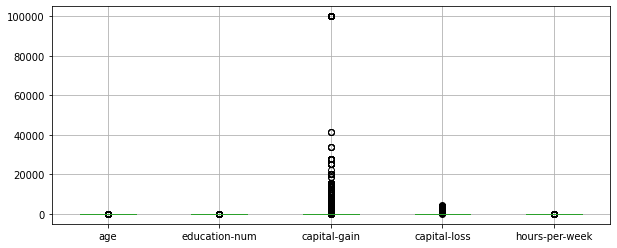

In [16]:
# outliers
data[continuous].boxplot(figsize=(10,4))

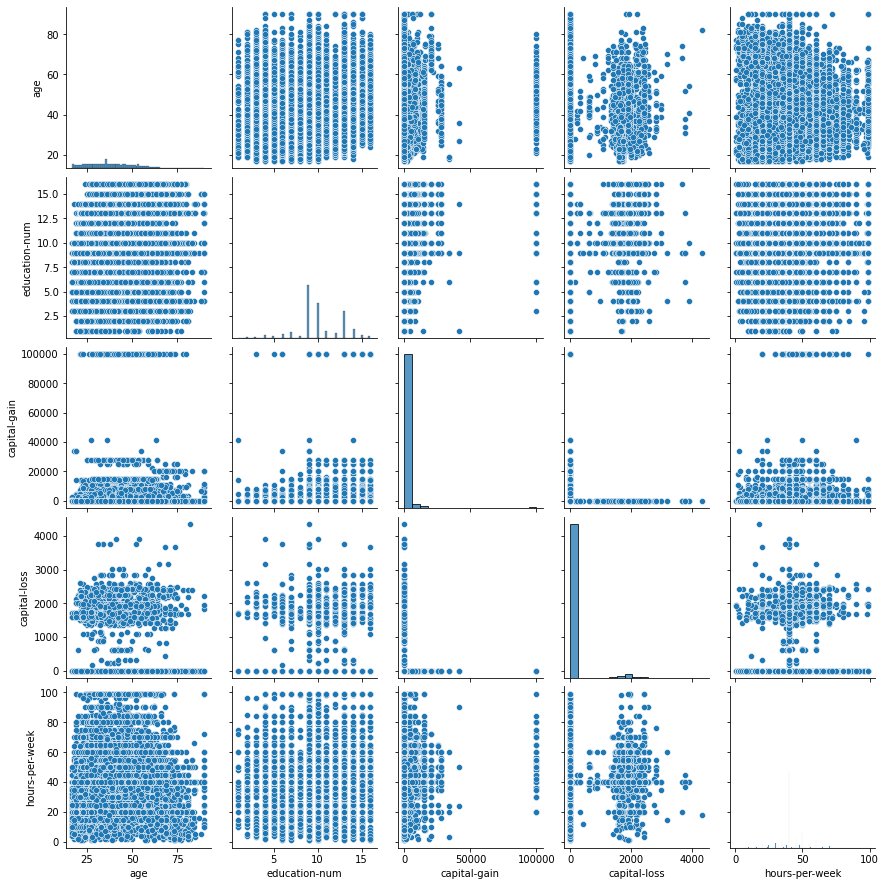

In [17]:
import seaborn as sns
sns.pairplot(data)


In [18]:
corr_matrix = data.corr()

In [19]:
corr_matrix

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.037623,0.079683,0.059351,0.101992
education-num,0.037623,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,0.146206,0.083880,0.054195,1.000000


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='education-num', ylabel='age'>,
        <AxesSubplot:xlabel='capital-gain', ylabel='age'>,
        <AxesSubplot:xlabel='capital-loss', ylabel='age'>,
        <AxesSubplot:xlabel='hours-per-week', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='education-num'>,
        <AxesSubplot:xlabel='education-num', ylabel='education-num'>,
        <AxesSubplot:xlabel='capital-gain', ylabel='education-num'>,
        <AxesSubplot:xlabel='capital-loss', ylabel='education-num'>,
        <AxesSubplot:xlabel='hours-per-week', ylabel='education-num'>],
       [<AxesSubplot:xlabel='age', ylabel='capital-gain'>,
        <AxesSubplot:xlabel='education-num', ylabel='capital-gain'>,
        <AxesSubplot:xlabel='capital-gain', ylabel='capital-gain'>,
        <AxesSubplot:xlabel='capital-loss', ylabel='capital-gain'>,
        <AxesSubplot:xlabel='hours-per-week', ylabel='capital-gain'>],
       [<AxesSubplot:xlabel='age', 

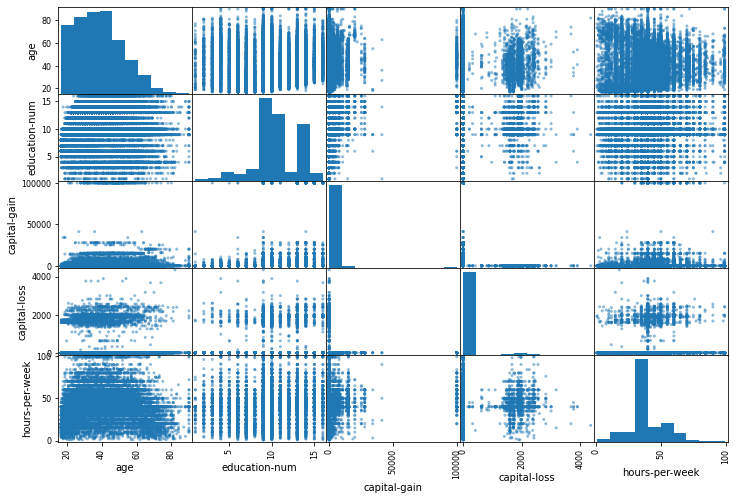

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[continuous], figsize=(12,8))

## Prepare the Data

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso

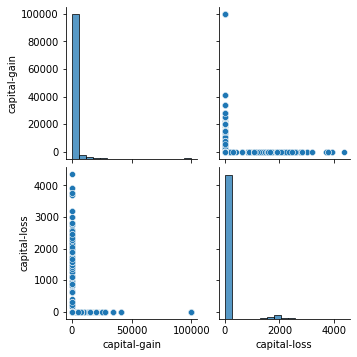

In [22]:
# skewed features
skewed = ['capital-gain', 'capital-loss']
sns.pairplot(data[skewed])

In [23]:
features_log_transformed = pd.DataFrame(data = features_raw)


NameError: name 'features_raw' is not defined

In [ ]:
features_log_transformed

In [ ]:
features_log_transformed[skewed]

In [ ]:
# Log-transform the skewed features
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

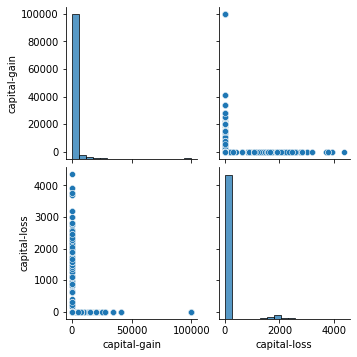

In [44]:
sns.pairplot(data[skewed])

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

TraitError: n_rows and n_columns must be positive integer

In [27]:
# create a test set to avoid data snooping bias
train_set, test_set = train_test_split(data, test_size=0.2 , random_state=42)

In [39]:
# separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('income', axis=1),  # predictors
    data['income'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=42)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((36177, 13), (9045, 13))

In [41]:
sns.pairplot(X_train['age'])


TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>